# **Problema 1: capacidade termica de um solido**

**calculo da quadratura gaussiana manualmente (sem import)**

In [101]:
import numpy as np

# constantes e arrays utilizados

p_d = 6.022e28
theta = 428
V = 1e-3
k_b = 1.38e-23

def cv(T):

  N = 50
  a, b = 0, theta/T
  h = (b-a)/N

  const = 9*V*p_d*k_b*(T/theta)**3

  xk = np.linspace(-1, 1, N)
  xk_line = 1/2*(b-a)*xk + 1/2*(b+a)



  # calculo das integrais por trapezio

  def funcPhi(x, k):
    # xk = np.linspace(-1, 1, N)
    prod = 1
    for m in range(1, N):
      if m != k:
        prod *= (x-xk[m])/(xk[k]-xk[m])
    return prod

  def somat(a, h, N, k):
    soma = 0
    for k2 in range(1, N):
      soma += funcPhi(a + k2*h, k)
    return soma

  def integral_trap(a, b, k):       # a = -1,   b = 1   e   k determina um valor do array phi
    N = 50
    h = (b-a)/N
    i_ab = (h/2)*(funcPhi(a, k)+funcPhi(b, k)+2*somat(a, h, N, k))
    return i_ab



  # calculo do array wk', usando eq(5.62) e eq(5.60)

  wk = []

  for k in range(1, N):
    wk.append(integral_trap(-1, 1, k))

  wk = np.array(wk)
  wk_line = 1/2*(b-a)*wk



  # calculo do array f(xk'), onde f é a funcao(x) dentro da integral de Cv

  def funcX(xk_line, N):
    f = []

    for k in range(1, N):
      nom = (xk_line[k]**4)*(np.exp(xk_line[k]))
      den = (np.exp(xk_line[k])-1)**2

      f.append(nom/den)
    return f
  fxk_line = funcX(xk_line, N)



  # funcao do somatorio da eq(5.63)

  def somatorio(wk_line, fxk_line):

    somatorio = 0
    for k in range(1, N-1):
      somatorio += wk_line[k]*fxk_line[k]
    return somatorio

  return const*somatorio(wk_line, fxk_line)

T = 100
Cv = cv(100)

print(f'N: {N} and Cv(100K): {Cv:.2f} J/K')

N: 50 and Cv(100K): 1150.53 J/K


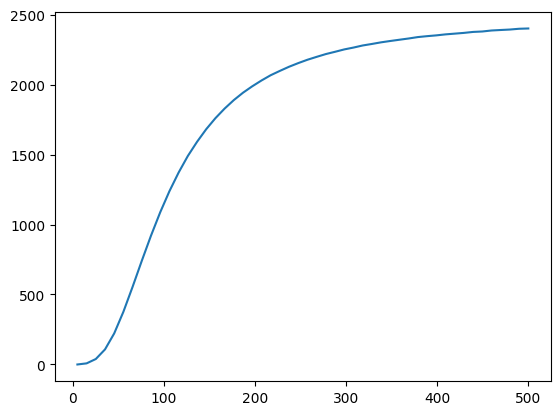

In [102]:
import matplotlib.pyplot as plt

Ts = np.linspace(5, 500, 50)
Cv = []

for T in Ts:
  Cv.append(cv(T))

plt.plot(Ts, Cv)
plt.show()

# **Problema 2: a constante de Stefan-Boltzmann**

x = h w/k T -> dx = (h/k T) dw, so

w³ = u³ k³ T³ / h³

resultado substituindo na integral

In [152]:
import numpy as np

kb = 1.38e-23     # m2 Kg/ s2 K
c = 3e8           # m/ s
h = 6.626e-34     # m2 Kg/ s
h_ = h/(2*np.pi)
T = 100

def const(T):
  nom, den = (kb**4)*T**4, 4*(np.pi**2)*(c**2)*(h_**3)
  return nom/den

N = 1000
a, b = 0.05, 1
h = (b-a)/N

def f(t):
  return (1-t)/(t**3)

def integ_simp(a, b, h, N):
  soma = 0

  for k in range(1, N):
    if k%2 != 0:
      soma += 4*f(a+k*h)
    else:
      soma += 2*f(a+k*h)

  i_simp = (h/3)*(f(a) + f(b) + soma)
  return i_simp

W1 = const(T)*integ_simp(a, b, h, N)

Utilizamos o método de símpson, segue calculo do erro abaixo:

In [153]:
W2 = const(T)*integ_simp(a, b, h, 2*N)

e2_euler_maclau = (1/3)*(W2-W1)
print(f'erro euler_maclaurin: {100*abs(e2_euler_maclau):.2f}%')

erro euler_maclaurin: 3.44%


# **Problema 3: atração gravitacional de uma folha uniforme**